<a href="https://colab.research.google.com/github/ljm9748/deepstudy/blob/master/18_RNN1_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q tensorflow-gpu

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 450kB 57.7MB/s 
     |████████████████████████████████| 3.9MB 50.4MB/s 
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.


In [5]:
import tensorflow as tf

print('gpu available : ', tf.test.is_gpu_available())

gpu available :  True


In [0]:
import numpy
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import reuters #데이터셋 불러오기
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.preprocessing import sequence
#from tensorflow.keras.utils import np_utils
from keras.utils.np_utils import to_categorical

In [0]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)


# 데이터를 학습, 데이터로 나누기
num_word는 가져올 개수를 의미하는데 여기서는 빈도순으로 1000개 가져온다

test_split은 train과 test비율을 의미함

In [11]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 2s 1us/step


numpy.max()로 Y_train 종류를 찾는데 0부터 인덱스가 시작되므로 1더해 category를 만든다

In [13]:
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


# 데이터 전처리
sequence.pad_sequences()함수로 패딩을 이용해 maxlen의 길이로 맞춰준다. 이때 넘치면 자르고 부족하면 0을 채워넣는다.

np_utils.to_categorical()함수로 원핫 인코딩과정을 실행한다.
![원-핫 인코딩](https://minjejeon.github.io/learningstock/images/20170605_one_hot_encoding_excel.jpg)

In [0]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

# 모델만들기, 컴파일, 실행

Sequenstial()로 모델생성하는데 Embedding층과 LSTM층이 추가됨

Embedding(불러온 단어의 총개수, 기사당 단어수): 데이터 전처리 과정을 통해 입력된 값 받아 다음층이 알아들을 수 있는 형태로 변환

LSTM(기사당 단어수, 기타옵션): RNN에서 기억 값에 대한 가중치 제어

활성화함수로 tanh함수 사용: tanh 함수는 함수의 중심값을 0으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제를 해결했다
![대체 텍스트](https://mlnotebook.github.io/img/transferFunctions/tanh.png)

미분함수에 대해 일정값 이상 커질시 미분값이 소실되는 문제는 여전히 남아있다.
![대체 텍스트](https://mlnotebook.github.io/img/transferFunctions/dtanh.png)

In [0]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 2s 17ms/step - loss: 2.5769 - accuracy: 0.3497 - val_loss: 2.1718 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 1s 12ms/step - loss: 2.0392 - accuracy: 0.4895 - val_loss: 1.9647 - val_accuracy: 0.5053
Epoch 3/20
90/90 [==============================] - 1s 12ms/step - loss: 1.8579 - accuracy: 0.5209 - val_loss: 1.8092 - val_accuracy: 0.5445
Epoch 4/20
90/90 [==============================] - 1s 12ms/step - loss: 1.7391 - accuracy: 0.5501 - val_loss: 1.7158 - val_accuracy: 0.5668
Epoch 5/20
90/90 [==============================] - 1s 12ms/step - loss: 1.6594 - accuracy: 0.5777 - val_loss: 1.8095 - val_accuracy: 0.5476
Epoch 6/20
90/90 [==============================] - 1s 12ms/step - loss: 1.6135 - accuracy: 0.5906 - val_loss: 1.6292 - val_accuracy: 0.5997
Epoch 7/20
90/90 [==============================] - 1s 12ms/step - loss: 1.5319 - accuracy: 0.6139 - val_loss: 1.5562 - val_accuracy: 0.6251
Epoch 8/20
90

In [19]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 0s 6ms/step - loss: 1.2120 - accuracy: 0.7066

 Test Accuracy: 0.7066


# 테스트, 학습셋의 오차

In [0]:
y_vloss = history.history['val_loss']

In [0]:
y_loss = history.history['loss']

#그래프로 표현

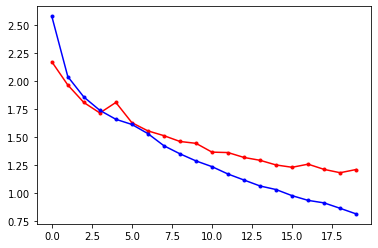

In [23]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


No handles with labels found to put in legend.


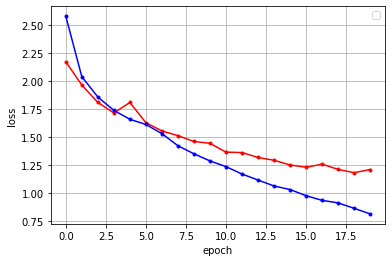

In [25]:
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.show()